In [1]:
import pandas as pd
import numpy as np

# Import csv files from each of us

In [2]:
df_alessandro = pd.read_csv('../../Data/csv_for_mturk_eval/alessandro.csv', encoding='utf-8')
df_alessandro.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,Lush,"da averle morbide, idratate e prive di pellici...",it,https://blog.cliomakeup.com/2017/03/arco-di-cu...,1,NaN,"[1, 1]",True,NaN


In [3]:
df_ginevra = pd.read_csv('../../Data/csv_for_mturk_eval/ginevra.csv', encoding='utf-8')
df_ginevra.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,Vichy,"un momento critico per la nostra pelle, ma con...",it,https://www.instagram.com/p/BSybl-nAlvG/,1,NaN,"[1, 1, 1, 1]",True,NaN


In [4]:
df_andrea = pd.read_csv('../../Data/csv_for_mturk_eval/andrea.csv', encoding='utf-8').drop(['brand_name_is_present',
                                                                                           'cosmetic_product_is_present',
                                                                                           'Comments'], axis=1)
df_andrea.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,La Roche-Posay,"Pelle perfetta, libera dalle imperfezioni e a ...",it,https://www.instagram.com/p/BL0UxHploJa/,1,NaN,"[1, 1, 1, 1, 1, 1, 1, 1]",True,TRUE


# Import labels from each of us

In [5]:
df_alessandro['capstone_label'] = pd.read_csv('../../Data/csv_for_mturk_eval/labeling_alessandro.csv', encoding='utf-8').capstone_label.values
df_alessandro.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,Lush,"da averle morbide, idratate e prive di pellici...",it,https://blog.cliomakeup.com/2017/03/arco-di-cu...,1,NaN,"[1, 1]",True,True


In [6]:
df_ginevra['capstone_label'] = pd.read_csv('../../Data/csv_for_mturk_eval/labeling_alessandro.csv', encoding='utf-8').capstone_label.values
df_ginevra.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,Vichy,"un momento critico per la nostra pelle, ma con...",it,https://www.instagram.com/p/BSybl-nAlvG/,1,NaN,"[1, 1, 1, 1]",True,True


In [7]:
y = df_andrea.capstone_label.values

y_andrea = []
for label in y:
    if (label=='TRUE'):
        y_andrea.append(True)
    else: # (label=='FALSE' || label=='FALSE ')
        y_andrea.append(False)
        
y_andrea = np.array(y_andrea)

In [8]:
df_andrea['capstone_label'] = y_andrea
df_andrea.head(1)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,La Roche-Posay,"Pelle perfetta, libera dalle imperfezioni e a ...",it,https://www.instagram.com/p/BL0UxHploJa/,1,NaN,"[1, 1, 1, 1, 1, 1, 1, 1]",True,True


# Concatenate the dataframes to produce final result

In [9]:
df = pd.concat([df_alessandro, df_ginevra, df_andrea])
df.head(5)

,brand_name,text,lang,link,mturker,model_decision,labels,aggregated_label,capstone_label
0,Lush,"da averle morbide, idratate e prive di pellici...",it,https://blog.cliomakeup.com/2017/03/arco-di-cu...,1,NaN,"[1, 1]",True,True
1,Dove,Dove son finita Come promesso sono tornata!\r\...,it,https://www.youtube.com/watch?v=XItKOoQWY2Q,1,NaN,"[1, 1, 1, 0]",True,False
2,Vichy,"un momento critico per la nostra pelle, ma con...",it,https://www.instagram.com/p/BSybl-nAlvG/,1,NaN,"[1, 1, 1, 1]",True,True
3,Lush,MY BEAUTY PROTOCOLE \r\n#pink #girlsnightout ...,it,https://www.instagram.com/p/BSWqwr-BQAt/,1,NaN,"[1, 1, 1, 1, 1]",True,True
4,La Roche-Posay,"@avon.italia , Gimme Brow di @benefitcosmetics...",it,https://www.facebook.com/1555633388011833/post...,1,NaN,"[1, 1, 1, 1]",True,True


In [10]:
df.shape

(180, 9)

# Confusion matrix

In [11]:
y_capstone = df.capstone_label.values.astype(np.bool)
y_mturk = df.aggregated_label.values.astype(np.bool)

Confusion matrix, without normalization
[[81  5]
 [ 9 85]]
Normalized confusion matrix
[[0.94 0.06]
 [0.1  0.9 ]]


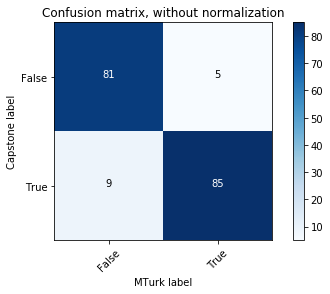

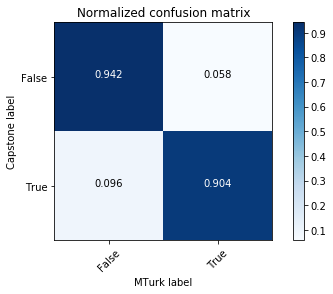

In [12]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = [False, True]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Capstone label')
    plt.xlabel('MTurk label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_capstone, y_mturk) #confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Compute accuracy of the labeling between us and MTurk

In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy overall = {:.3f}'.format(accuracy_score(y_capstone, y_mturk)))
print('Correct overall = {}'.format(accuracy_score(y_capstone, y_mturk, normalize=False)))
print('Wrong overall = {}'.format(df.shape[0] - accuracy_score(y_capstone, y_mturk, normalize=False)))

Accuracy overall = 0.922
Correct overall = 166
Wrong overall = 14


## Overall per language

### Italian

In [14]:
df_mturk_it = df.loc[df['lang'] == 'it']

In [15]:
y_capstone = df_mturk_it.capstone_label.values.astype(np.bool)
y_mturk = df_mturk_it.aggregated_label.values.astype(np.bool)

In [16]:
print('Accuracy Italian = {:.3f}'.format(accuracy_score(y_capstone, y_mturk)))
print('Correct in Italian = {}'.format(accuracy_score(y_capstone, y_mturk, normalize=False)))
print('Wrong in French = {}'.format(df_mturk_it.shape[0] - accuracy_score(y_capstone, y_mturk, normalize=False)))

Accuracy Italian = 0.900
Correct in Italian = 54
Wrong in French = 6


### Spanish

In [17]:
df_mturk_es = df.loc[df['lang'] == 'es']

In [18]:
y_capstone = df_mturk_es.capstone_label.values.astype(np.bool)
y_mturk = df_mturk_es.aggregated_label.values.astype(np.bool)

In [19]:
print('Accuracy Spanish = {:.3f}'.format(accuracy_score(y_capstone, y_mturk)))
print('Correct in Spanish = {}'.format(accuracy_score(y_capstone, y_mturk, normalize=False)))
print('Wrong in Spanish = {}'.format(df_mturk_es.shape[0] - accuracy_score(y_capstone, y_mturk, normalize=False)))

Accuracy Spanish = 0.950
Correct in Spanish = 57
Wrong in Spanish = 3


### French

In [20]:
df_mturk_fr = df.loc[df['lang'] == 'fr']

In [21]:
y_capstone = df_mturk_fr.capstone_label.values.astype(np.bool)
y_mturk = df_mturk_fr.aggregated_label.values.astype(np.bool)

In [22]:
print('Accuracy French = {:.3f}'.format(accuracy_score(y_capstone, y_mturk)))
print('Correct in French = {}'.format(accuracy_score(y_capstone, y_mturk, normalize=False)))
print('Wrong in French = {}'.format(df_mturk_fr.shape[0] - accuracy_score(y_capstone, y_mturk, normalize=False)))

Accuracy French = 0.917
Correct in French = 55
Wrong in French = 5
